,1,2
0,,
GRB080714086,13.685026,-44.878315
GRB080714425,21.396776,5.618724
GRB080714745,3.317439,29.638693
GRB080715950,-30.822834,-23.698452
GRB080717543,18.235985,-28.663557
...,...,...
GRB180715755,1.830914,-82.395638
GRB180720598,-39.672222,56.414753
GRB180913783,0.783189,-81.785744


,1,2,3
0,,,
GRB080714086,13.685026,-44.878315,C2
GRB080714425,21.396776,5.618724,C2
GRB080714745,3.317439,29.638693,C2
GRB080715950,-30.822834,-23.698452,C2
GRB080717543,18.235985,-28.663557,C2
...,...,...,...
GRB180715755,1.830914,-82.395638,C1
GRB180720598,-39.672222,56.414753,C2
GRB180913783,0.783189,-81.785744,C1


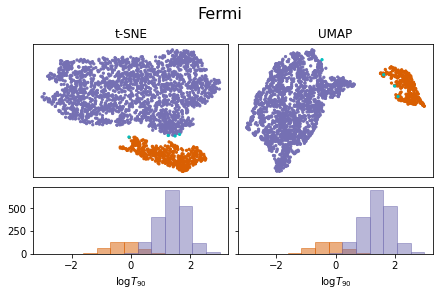

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from ipynb.fs.full.config_Fermi import conf
# This is to prevent a trivial warning pop-up
import warnings
warnings.filterwarnings('ignore')

emb1 = pd.read_csv("embedding_TSNE_Fermi_20.csv", header = None).set_index(0)
emb2 = pd.read_csv("embedding_UMAP_Fermi.csv", header = None).set_index(0)


plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)
fig = plt.figure(constrained_layout=True)
fig.suptitle('Fermi', size=16)
gs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(gs[:-1, 0])
ax2 = fig.add_subplot(gs[:-1, 1])
ax3 = fig.add_subplot(gs[-1, 0])
ax4 = fig.add_subplot(gs[-1, 1])
ax4.set(yticklabels=())
ax1.set(yticks=(), xticks=(), title='t-SNE')
ax2.set(yticks=(), xticks=(), title='UMAP')

#display(emb1)
groups = {'C1':-1, 'C2':0, 'c':1}
emb1[3] = DBSCAN(eps=5).fit_predict(emb1.loc[:,[1,2]])
emb1[3] = emb1[3].map({0:list(groups)[1],1:list(groups)[0]})
#display(emb1)
emb2[3] = DBSCAN(eps=1).fit_predict(emb2.loc[:,[1,2]])
emb2[3] = emb2[3].map({0:list(groups)[1],1:list(groups)[0]})

union = pd.concat([emb1[3], emb2[3]], axis=1, ignore_index=True)
for (emb,ax) in [(emb1,ax1), (emb2,ax2)]:
    emb.loc[union[union[0] != union[1]].index.tolist(), 3] = list(groups)[2]
    for i in groups:
        group = emb.groupby(emb[3]).get_group(i)
        ax.scatter(group[1], group[2], s=conf['radius'], c=group[3], cmap=conf['cmap'], zorder = groups[i])

#emb1_plot = ax1.scatter(emb1[1], emb1[2], s=conf['radius'], c=emb1[3], cmap=conf['cmap'])
#emb2_plot = ax2.scatter(emb2[1], emb2[2], s=conf['radius'], c=emb2[3], cmap=conf['cmap'])

duration_data = pd.read_pickle('DataFrames/duration_data_Fermi.dat')
group1 = emb1.loc[:,3].groupby(emb1[3])
short1 = group1.get_group('C1')
long1 = group1.get_group('C2')
group2 = emb2.loc[:,3].groupby(emb2[3])
short2 = group2.get_group('C1')
long2 = group2.get_group('C2')
ax3.hist(np.log10(duration_data.loc[short1.index,'T90']), range = (-3,3), bins = 13, color = 'C1', edgecolor = 'C1', alpha = 0.5)
ax3.hist(np.log10(duration_data.loc[long1.index,'T90']), range = (-3,3), bins = 13, color = 'C2', edgecolor = 'C2', alpha = 0.5)
ax3.set_xlabel('log$T_{90}$')
ax4.hist(np.log10(duration_data.loc[short2.index,'T90']), range = (-3,3), bins = 13, color = 'C1', edgecolor = 'C1', alpha = 0.5)
ax4.hist(np.log10(duration_data.loc[long2.index,'T90']), range = (-3,3), bins = 13, color = 'C2', edgecolor = 'C2', alpha = 0.5)
ax4.set_xlabel('log$T_{90}$')

fig.savefig("GRB-Fermi-Final.jpg", dpi=300)
fig.show()